# Part 1: Generating the University Master Schedule

This notebook handles the first major task: creating a conflict-free master schedule for all courses, teachers, and rooms using a Genetic Algorithm.

In [16]:
import pandas as pd
import logging
import time
import sys
import os

# Add the 'src' folder to the Python path
# This assumes your notebook is in the main project folder, and 'src' is a subfolder.
# If your notebook is in another location, you might need to adjust the path.
module_path = os.path.abspath(os.path.join(os.getcwd(), 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Now we can import our custom classes from the src folder
from genetic_algorithm_schedulerPYGAD import DataPreparer, SchedulerGA

In [17]:
# Configure a simple logger to print messages to the notebook's output.
# We set the level to INFO to see high-level progress without too much detail.
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)-8s - %(message)s',
    # By default, basicConfig logs to the stream (console/notebook output),
    # so we don't need file handlers for this demonstration.
    force=True  # Use force=True to re-apply the configuration in a notebook environment
)

logging.info("Logging is now configured for this notebook run.")

2025-08-03 18:25:58,893 - INFO     - Logging is now configured for this notebook run.


## 1. Load Input Data

Here, we'll load all the necessary CSV files into pandas DataFrames. These files contain the core information about courses, rooms, teachers, and their preferences.

In [18]:
DATA_PATH = 'mock_data/'

try:
    courses = pd.read_csv(f"{DATA_PATH}courses.csv")
    classrooms = pd.read_csv(f"{DATA_PATH}classrooms.csv")
    teacher_courses = pd.read_csv(f"{DATA_PATH}teacher_courses.csv")
    teacher_preferences = pd.read_csv(f"{DATA_PATH}teacher_preferences.csv")

    logging.info("All data files loaded successfully.")

    # Display the first few rows of the courses dataframe to verify
    print("Sample of the 'courses' data:")
    display(courses.head())

except FileNotFoundError as e:
    logging.error(f"FATAL: {e}. Please ensure the 'mock_data' folder exists and contains all required CSV files.")

2025-08-03 18:25:58,933 - INFO     - All data files loaded successfully.


Sample of the 'courses' data:


,course_id,course_name,lectures_per_week
0,CS101,Intro to Programming,3
1,CS102,Data Structures,2
2,CS201,Database Systems,2
3,CS202,Computer Networks,2
4,CS301,Information Security,1


## 2. Prepare Data for the Algorithm

Now, we'll instantiate the `DataPreparer` class. This class takes our raw DataFrames and processes them into the specific data structures required by the genetic algorithm, like the final list of all individual lectures that need to be scheduled.

In [19]:
try:
    data_preparer = DataPreparer(courses, classrooms, teacher_courses, teacher_preferences)
    logging.info("DataPreparer object created successfully.")

    # Display some stats from the prepared data to verify
    print(f"Total individual lectures to be scheduled: {len(data_preparer.lectures_to_schedule)}")
    print(f"Total available timeslots: {len(data_preparer.timeslots)}")
    
    print("\nSample of the final list of lectures to be scheduled:")
    # We convert the list of dicts to a DataFrame for nice display
    display(pd.DataFrame(data_preparer.lectures_to_schedule).head())

except NameError:
    logging.error("One of the required dataframes (courses, classrooms, etc.) is not defined. Please re-run the previous cell.")
except Exception as e:
    logging.error(f"An error occurred during data preparation: {e}")

2025-08-03 18:25:58,950 - INFO     - Initializing DataPreparer...
2025-08-03 18:25:58,950 - INFO     - Data prepared: 14 total lectures to schedule.
2025-08-03 18:25:58,950 - INFO     - DataPreparer initialized successfully.
2025-08-03 18:25:58,950 - INFO     - DataPreparer object created successfully.


Total individual lectures to be scheduled: 14
Total available timeslots: 45

Sample of the final list of lectures to be scheduled:


,course_id,teacher_id
0,CS101,1
1,CS101,1
2,CS101,1
3,CS202,1
4,CS202,1


## 3. Configure and Instantiate the Genetic Algorithm

With the data prepared, we can now define the parameters for our genetic algorithm and create an instance of our main `SchedulerGA` class.

In [20]:
# Define GA Parameters
ga_parameters = {
    'generations': 150,
    'sol_per_pop': 1000,
    'parents_mating': 50,
    'mutation_percent': 10
}

logging.info(f"GA Parameters set: {ga_parameters}")
print("Genetic Algorithm parameters have been defined.")

2025-08-03 18:25:58,969 - INFO     - GA Parameters set: {'generations': 150, 'sol_per_pop': 1000, 'parents_mating': 50, 'mutation_percent': 10}


Genetic Algorithm parameters have been defined.


In [21]:
# Instantiate the SchedulerGA class

try:
    scheduler = SchedulerGA(data_preparer, ga_parameters)
    logging.info("SchedulerGA instance created and configured successfully.")
    print("Scheduler has been successfully initialized and is ready to run.")

except Exception as e:
    logging.error(f"An error occurred during SchedulerGA initialization: {e}")

2025-08-03 18:25:58,980 - INFO     - Initializing SchedulerGA...
2025-08-03 18:25:59,062 - INFO     - PyGAD instance created and configured.
2025-08-03 18:25:59,062 - INFO     - SchedulerGA instance created and configured successfully.


Scheduler has been successfully initialized and is ready to run.


## 4. Run the Algorithm and Display Results

This is the final step. We'll call the `.run()` method to start the evolution process. After the algorithm finishes, we will format and display the best schedule found. We will also save the output to `master_schedule.csv` for the next part of our project.

In [22]:
# Run the Genetic Algorithm

logging.info("Starting the Genetic Algorithm evolution...")
print("The Genetic Algorithm is now running. This may take a few moments depending on the parameters...")

start_time = time.time()

# The .run() method starts the GA and returns the best solution and its penalty score
best_schedule, final_penalty = scheduler.run()

end_time = time.time()
execution_time = end_time - start_time

logging.info(f"GA execution finished in {execution_time:.2f} seconds.")
print(f"Execution complete in {execution_time:.2f} seconds.")

2025-08-03 18:25:59,072 - INFO     - Starting the Genetic Algorithm evolution...
2025-08-03 18:25:59,074 - INFO     - Starting Genetic Algorithm evolution...


The Genetic Algorithm is now running. This may take a few moments depending on the parameters...


2025-08-03 18:25:59,214 - INFO     - Generation 1 | Best Fitness: 0.000222
2025-08-03 18:25:59,314 - INFO     - Generation 2 | Best Fitness: 0.000286
2025-08-03 18:25:59,448 - INFO     - Generation 3 | Best Fitness: 0.000400
2025-08-03 18:25:59,542 - INFO     - Generation 4 | Best Fitness: 0.000500
2025-08-03 18:25:59,631 - INFO     - Generation 5 | Best Fitness: 0.000667
2025-08-03 18:25:59,792 - INFO     - Generation 6 | Best Fitness: 0.001000
2025-08-03 18:25:59,900 - INFO     - Generation 7 | Best Fitness: 0.001000
2025-08-03 18:26:00,006 - INFO     - Generation 8 | Best Fitness: 0.002000
2025-08-03 18:26:00,149 - INFO     - Generation 9 | Best Fitness: 0.002000
2025-08-03 18:26:00,244 - INFO     - Generation 10 | Best Fitness: 0.002000
2025-08-03 18:26:00,387 - INFO     - Generation 11 | Best Fitness: 0.002000
2025-08-03 18:26:00,490 - INFO     - Generation 12 | Best Fitness: 0.002000
2025-08-03 18:26:00,593 - INFO     - Generation 13 | Best Fitness: 0.002000
2025-08-03 18:26:00,7

Execution complete in 19.37 seconds.



---  Best Schedule Found  ---
Final Penalty Score: 500.00 (Note: a score of 0.0 means all hard constraints are met).


,Day,Time,course_id,teacher_id,room_id
6,Monday,12:00,CS102,2,R101
5,Monday,15:00,CS102,2,R101
0,Sunday,08:00,CS101,1,R201
3,Sunday,10:00,CS202,1,R102
1,Sunday,11:00,CS101,1,R201
2,Sunday,12:00,CS101,1,R102
4,Sunday,13:00,CS202,1,R102
7,Thursday,16:00,CS301,3,R101
11,Tuesday,12:00,CS401,3,R101
10,Tuesday,13:00,CS401,3,R201


2025-08-03 18:26:38,140 - INFO     - Master schedule saved to 'master_schedule.csv'



 Schedule successfully saved to 'master_schedule.csv'


C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pygad\visualize\plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


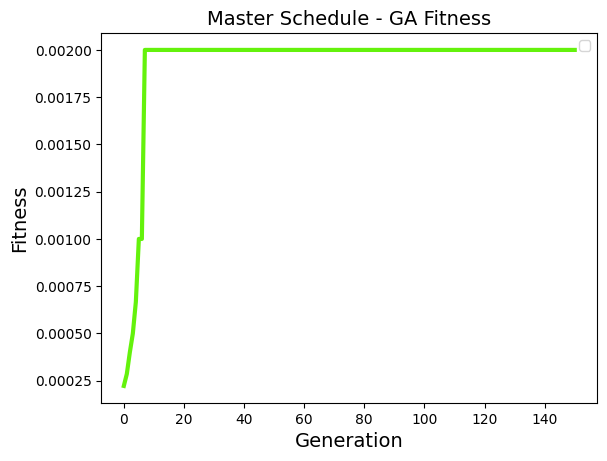

2025-08-03 18:26:42,661 - INFO     - Fitness plot saved to master_schedule_fitness.png


 Fitness plot saved to 'master_schedule_fitness.png'


In [23]:
# Format and Display the Best Schedule

print("\n" + "="*50)
print("---  Best Schedule Found  ---")
print("="*50)

print(f"Final Penalty Score: {final_penalty:.2f} (Note: a score of 0.0 means all hard constraints are met).")

# Convert the schedule (which is a list of dictionaries) to a DataFrame for clean display
schedule_df = pd.DataFrame(best_schedule)

if not schedule_df.empty:
    # Split the 'timeslot' into 'Day' and 'Time' for better readability
    schedule_df[['Day', 'Time']] = schedule_df['timeslot'].str.split('_', expand=True)
    schedule_df_sorted = schedule_df.sort_values(by=['Day', 'Time'])

    # Display the final, sorted schedule
    display(schedule_df_sorted[['Day', 'Time', 'course_id', 'teacher_id', 'room_id']])

    # --- Save the master schedule to a new CSV file ---
    output_filename = "master_schedule.csv"
    schedule_df_sorted.to_csv(output_filename, index=False)
    logging.info(f"Master schedule saved to '{output_filename}'")
    print(f"\n Schedule successfully saved to '{output_filename}'")
    
    # --- Display the fitness plot ---
    fitness_plot_path = "master_schedule_fitness.png"
    scheduler.ga_instance.plot_fitness(title="Master Schedule - GA Fitness", save_dir=fitness_plot_path)
    logging.info(f"Fitness plot saved to {fitness_plot_path}")
    print(f" Fitness plot saved to '{fitness_plot_path}'")
    
else:
    print("No schedule could be generated.")